# <center> LAb 6b: NCA, LDA and PCA with Kernels functions<br> Kernel Principal Components Analysis (KPCA)<br>Kernel Linear Discriminant Analysis(KLDA)<br> <small>Réda DEHAK<br> 25 june 2021</small> </center>

The goal of this lab is :

    - Reproduce the result of this scientific paper about NCA: 
[J. Goldberger, G. Hinton, S. Roweis, R. Salakhutdinov, "Neighbourhood Components Analysis", Advances in Neural Information Processing Systems, vol 17, pp. 513-520, 2005.](https://www.cs.toronto.edu/~hinton/absps/nca.pdf)
    
     - Test and use KPCA and KLDA:
[S. Mika, G. Rätsch,J. Weston,B. Schölkopf, KR. Müller, "Fisher discriminant analysis with kernels", Neural Networks for Signal Processing, vol IX. pp. 41–48, 1999.](https://doc.ml.tu-berlin.de/publications/publications/MikRaeWesSchMue99.pdf)
    
    
We will use the [optdigits dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/) from UCI. This database is a small set of handwritten digits compared to the MNIST databases. A preprocessing program available by NIST was used to extract 64 features which represent the number of on pixel of nonoverlapping blocks of 4x4 extracted from normalized image. [See](optdigits.names.txt) for more details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(trainfile, testfile):
    dataTrain = pd.read_csv(trainfile, header=None)
    dataTest = pd.read_csv(testfile, header=None)

    Xtrain = dataTrain.values[:,0:-1]
    ytrain = dataTrain.values[:,-1]

    Xtest = dataTest.values[:,0:-1]
    ytest = dataTest.values[:,-1]
    
    return (Xtrain, ytrain, Xtest, ytest)

### Part 1: Neighborhood Components Analysis (NCA)

1- Load circles, wines, spiral and optdigits dataset

In [3]:
datawines = loadData('wine.tra', 'wine.tes')
datacircles = loadData('circles.tra', 'circles.tes')
dataspiral = loadData('spiral.tra', 'spiral.tes')
dataoptdigit = loadData('/Users/anthonyalam/Desktop/AIS/s2/ISML PROJECT  CAR AUTO..Machine learning/optdigits.tra', '/Users/anthonyalam/Desktop/AIS/s2/ISML PROJECT  CAR AUTO..Machine learning/optdigits.tes')

In [4]:
datawines[3]

array([2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 3., 3., 3., 2., 1., 3., 2.,
       2., 3., 1., 1., 2., 3., 3., 1., 2., 2., 1., 1., 2., 1., 1., 1., 3.,
       1., 1.])

In [30]:
#datawines

In [31]:
#datacircles

In [32]:
#dataspiral

In [33]:
#dataoptdigit

In [34]:
Datas = [('Circles', datacircles), ('Wines', datawines),  ('Optdigits', dataoptdigit)]

In [35]:
#plt.plot(Datas)

In [36]:
Datas

[('Circles',
  (array([[ 0.094312, -1.444987],
          [ 0.924292, -0.450706],
          [ 2.588839,  2.145224],
          ...,
          [-3.405062, -0.540968],
          [-2.208493, -2.549267],
          [-0.048362,  0.205935]]),
   array([3., 1., 5., 5., 5., 1., 1., 2., 1., 5., 3., 5., 5., 1., 1., 5., 1.,
          4., 4., 5., 5., 4., 1., 5., 5., 1., 3., 5., 1., 3., 3., 1., 5., 5.,
          3., 3., 3., 3., 5., 2., 3., 5., 2., 1., 1., 1., 3., 4., 3., 2., 4.,
          1., 2., 5., 2., 2., 4., 5., 2., 3., 2., 5., 5., 4., 4., 4., 3., 4.,
          2., 2., 3., 4., 5., 2., 3., 1., 3., 3., 3., 2., 5., 2., 3., 5., 4.,
          2., 5., 2., 5., 1., 5., 1., 4., 5., 1., 1., 3., 5., 3., 5., 1., 4.,
          1., 4., 2., 2., 2., 5., 4., 5., 1., 1., 2., 2., 4., 3., 5., 5., 5.,
          2., 3., 1., 5., 5., 5., 5., 5., 4., 2., 2., 3., 1., 2., 2., 2., 3.,
          3., 4., 1., 3., 5., 4., 2., 3., 4., 5., 2., 5., 5., 1., 3., 5., 4.,
          4., 4., 4., 1., 5., 4., 4., 4., 1., 5., 4., 5., 4., 5.

2- Train a KNN classifier on training data, and compute the performance on test data using different values of k.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(datawines[0],datawines[1])
y_pred = knn.predict(datawines[2])
#knn.score(datawines[2], datawines[3])

print(accuracy_score(datawines[3], y_pred))

0.75


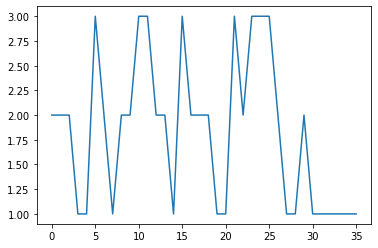

In [38]:
plt.plot(y_pred)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(datawines[0],datawines[1])
y_pred = knn.predict(datawines[2])
#knn.score(datawines[2], datawines[3])

print(accuracy_score(datawines[3], y_pred))

0.7777777777777778


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(dataspiral[0],dataspiral[1])
y_pred = knn.predict(dataspiral[2])
#knn.score(datawines[2], datawines[3])

print(accuracy_score(dataspiral[3], y_pred))

0.7974683544303798


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(dataspiral[0],dataspiral[1])
y_pred = knn.predict(dataspiral[2])
#knn.score(datawines[2], datawines[3])

print(accuracy_score(dataspiral[3], y_pred))

0.569620253164557


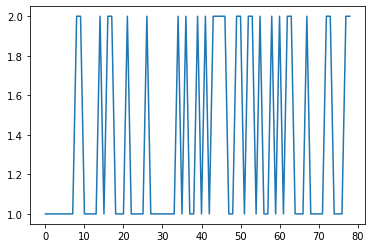

In [42]:
plt.plot(y_pred)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(dataoptdigit[0],dataoptdigit[1])
y_pred = knn.predict(dataoptdigit[2])
#knn.score(datawines[2], datawines[3])

print(accuracy_score(dataoptdigit[3], y_pred))

0.9766277128547579


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(dataoptdigit[0],dataoptdigit[1])
y_pred = knn.predict(dataoptdigit[2])
#knn.score(datawines[2], datawines[3])

print(accuracy_score(dataoptdigit[3], y_pred))

0.9738452977184195


In [45]:
datawines[3]

array([2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 3., 3., 3., 2., 1., 3., 2.,
       2., 3., 1., 1., 2., 3., 3., 1., 2., 2., 1., 1., 2., 1., 1., 1., 3.,
       1., 1.])

In [46]:
# Datas[0:2]

In [47]:
y_pred.shape

(1797,)

In [48]:
Datas[1]

('Wines',
 (array([[1.245e+01, 3.030e+00, 2.640e+00, ..., 6.700e-01, 1.730e+00,
          8.800e+02],
         [1.281e+01, 2.310e+00, 2.400e+00, ..., 6.600e-01, 1.360e+00,
          5.600e+02],
         [1.243e+01, 1.530e+00, 2.290e+00, ..., 6.900e-01, 2.840e+00,
          3.520e+02],
         ...,
         [1.208e+01, 1.390e+00, 2.500e+00, ..., 9.300e-01, 3.190e+00,
          3.850e+02],
         [1.237e+01, 1.630e+00, 2.300e+00, ..., 8.900e-01, 2.780e+00,
          3.420e+02],
         [1.371e+01, 1.860e+00, 2.360e+00, ..., 1.110e+00, 4.000e+00,
          1.035e+03]]),
  array([3., 3., 2., 3., 3., 2., 1., 3., 1., 1., 2., 2., 3., 2., 2., 3., 2.,
         1., 2., 1., 1., 2., 3., 1., 2., 2., 1., 1., 3., 1., 3., 2., 2., 3.,
         2., 1., 2., 1., 3., 1., 2., 1., 2., 1., 2., 3., 1., 3., 1., 1., 3.,
         1., 2., 2., 3., 1., 2., 2., 2., 3., 2., 1., 1., 2., 3., 2., 2., 2.,
         3., 2., 1., 1., 2., 2., 1., 3., 3., 3., 2., 2., 3., 1., 2., 2., 2.,
         2., 3., 1., 1., 2., 3., 2., 

3- try to compare the result of PCA, LDA and NCA on these data. Plot the projection of test data using PCA, LDA and NCA into two first axis.

In [49]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)
Classifiers = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

4- Train a KNN classifier on training data, and compute the performance on test data using a PCA, LDA, NCA.

In [24]:
# for i, (name, model) in enumerate(Classifiers):
#     for (named, d) in Datas:
#         #New Figure
#         ....

In [25]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(dataoptdigit[0],dataoptdigit[1])
# y_pred = knn.predict(dataoptdigit[2])
# #knn.score(datawines[2], datawines[3])

# print(accuracy_score(dataoptdigit[3], y_pred))

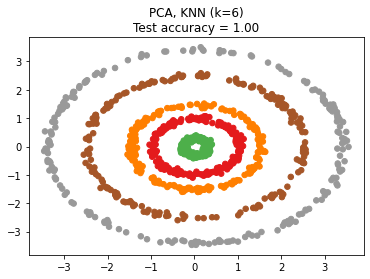

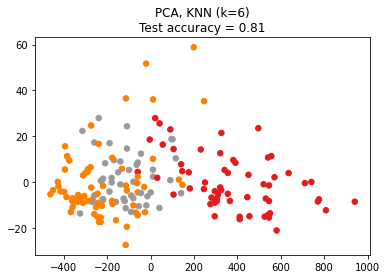

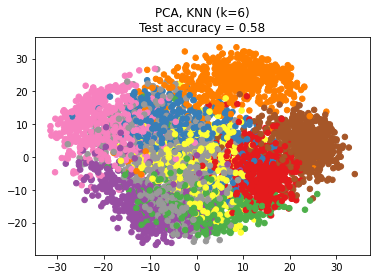

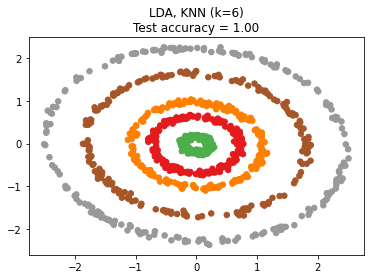

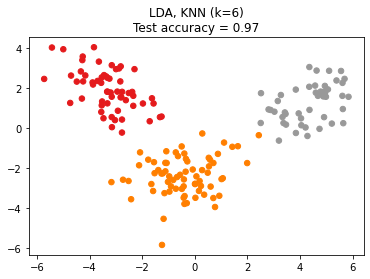

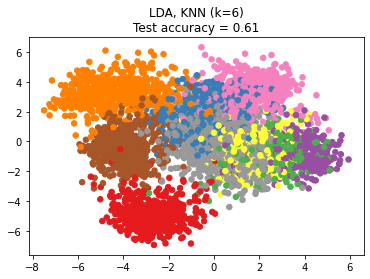

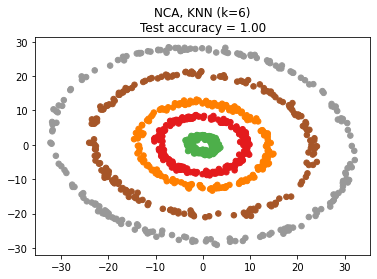

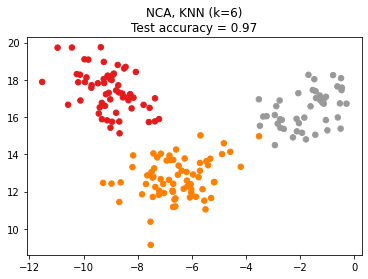

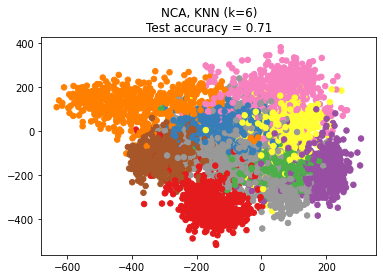

In [52]:
from sklearn.preprocessing import StandardScaler

n_neighbors = 6
random_state = 0


#dim = len(Datas)
#n_classes = len(np.unique(y))


# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)


# plt.figure()
for i, (name, model) in enumerate(Classifiers):
    for (named, d) in Datas:
        plt.figure()
        # plt.subplot(1, 3, i + 1, aspect=1)

        # Fit the method's model
        model.fit(d[0], d[1])

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(d[0]), d[1])

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(d[2]), d[3])

        # Embed the data set in 2 dimensions using the fitted model
        X = np.concatenate((d[0],d[2])) #[d[0],d[2]]
        y = np.concatenate((d[1],d[3]))
        X_embedded = model.transform(X)
        # X_embedded = model.transform(Datas)

        # Plot the projected points and show the evaluation score
        plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
        plt.title(
            "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
        )
    plt.show()

5- Conclude, How to improve the performances of these methods (show an example)?

### Part 2: Nolinear dimension reduction (Kernel Methods)

- Train a KPCA with linear kernel and compare the result to the classical PCA

In [81]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [127]:
y.shape

(1797,)

In [82]:
X.shape

(400, 2)

In [121]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)
X_reduced

model PCA(n_components=2)


array([[ -1.25946693,  21.27488299],
       [  7.95760984, -20.76870587],
       [  6.99192436,  -9.95598231],
       ...,
       [ 10.80128452,  -6.96025113],
       [ -4.87210009,  12.42395441],
       [ -0.34438757,   6.36555705]])

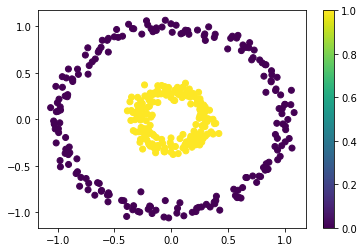

In [84]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y)
plt.colorbar()

In [85]:
model.components_.shape

(2, 2)

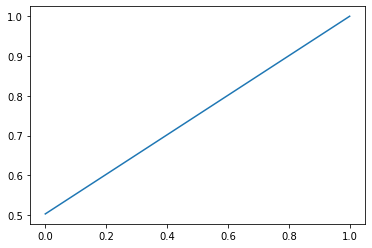

In [86]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [87]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 99)

0

In [88]:
X_recoverd = model.inverse_transform(X_reduced)

In [92]:
#should have more dimentions in order to work
plt.imshow(X_recoverd[0].reshape((8, 8)))

ValueError: cannot reshape array of size 2 into shape (8,8)

In [5]:
def GramMetrix(X1, X2, kernel):
    N = len(X1)
    M = len(X2)
    np.zeros((N, M))
    for i in range (N):
        for j in range (M):
            G[i, j] = kernel(X1[i], X2[j])
            
    return G;

def kernelPCA:
    

- Test the result with polynomial and RBF kernels

- Write a function that fit a KLDA on the X dataset, use the kernel function as a parameter.

- Train a KLDA with linear kernel and compare the result to the classical LDA

In [128]:
def fit_KLDA(X):
    Sb = X.mean()
    Sw = 
    

- Try to use a KPCA of the optdigit data (use different kernel functions)
- Plot each example of the testing data in the first two factorial axis of PCA(2D space), use different color foreach classe? compare with the classical PCA, what did you conclude?

- Train a KNN on the projected data into the $d$ first factorial axis of KPCA, and test the performances on the testing data? try different values of $d$ and $k$?  

We will try a Kernel Linear Discriminant Analysis method to separate the 10 classes. Train a Kernel Linear Discriminant Analysis on the training data and plot each example in the 2d plan corresponding to the two axis with largest eigen values? what did you conclude? (use different kernel functions)

Train a KNN on the projected data into the $d$ first axis of KLDA and test the performances on the testing data? try different values of $d$ and $k$?

Compare the performances of the KNN with PCA, LDA, NCA, KPCA and KLDA?